In [8]:
print("Вариант:", sum([ord(x) for x in u'Седых']) % 3 + 1)

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Вариант: 3


In [9]:
class Model:
    def __init__(self):
        pass

    def sample_a(self):
        return np.random.uniform(self.a_min, self.a_max)

    def sample_b(self):
        return np.random.uniform(self.b_min, self.b_max)

def generate(N, a, b, params, model):
    """
    Генератор d1,...,dN для моделей 3 и 4.
    N      – количество лекций
    a, b   – заданные значения параметров a и b
    params – словарь с ключами 'amin','amax','bmin','bmax','p1','p2','p3'
    model  – номер модели: 3 (биномиальная) или 4 (пуассоновская)
    """
    p1 = params['p1']
    p2 = params['p2']
    p3 = params['p3']
    a_max = params['amax']
    b_max = params['bmax']
    limit = params.get('limit', False)

    d = np.empty(N, dtype=int)

    for i in range(N):
        # c_n | a, b
        if model == 3:
            # модель 3: c_n = Bin(a, p1) + Bin(b, p2)
            c_a = np.random.binomial(a, p1)
            c_b = np.random.binomial(b, p2)
            c = c_a + c_b
        elif model == 4:
            # модель 4: c_n ~ Poiss(a*p1 + b*p2)
            lam = a * p1 + b * p2
            c = np.random.poisson(lam)
        else:
            raise ValueError("model must be 3 or 4")

        if limit:
            c = np.clip(c, 0, a_max + b_max)

        # d_n | c_n ~ Bin(c_n, p3) (для обеих моделей)
        d_n = np.random.binomial(c, p3)
        if limit:
            d_n = np.clip(d_n, 0, 2 * (a_max + b_max))

        d[i] = d_n

    return d

In [11]:
params = {
'amin': 75,
'amax': 90,
'bmin': 500,
'bmax': 600,
'p1': 0.1,
'p2': 0.01,
'p3': 0.3
}

In [12]:
model_3_4 = Model()
ds = generate(1000, 80, 550, params, model=3)
ds

array([ 5,  3,  5,  3,  5,  4,  1,  5,  3,  4,  3,  8,  6,  7,  3,  4,  6,
        1,  6,  6,  7,  3,  4,  0,  0,  6,  3,  4,  7,  3,  5,  7,  4,  6,
        1,  2,  0,  2,  1,  5,  3,  2,  4,  3,  3,  1,  2,  5,  3,  5,  6,
        2,  7,  5,  4,  6,  1,  3,  4,  2,  5,  1,  5,  4,  3,  3,  5,  6,
        1,  2,  1,  5,  3,  5,  1,  1,  2,  7,  3,  4,  5,  2,  3,  5,  4,
        2,  5, 13,  4,  3,  7,  5,  3,  2,  3,  3,  3,  3,  3,  3,  8,  7,
        4,  4,  7,  5,  5,  7,  4,  7,  4,  9,  2,  6,  4,  2,  3,  2,  2,
        3,  1,  3,  2,  4,  1,  4,  7,  6,  2,  3,  2,  5,  3,  9,  6,  4,
        3,  7,  5,  5,  4,  6,  2,  7,  9,  4,  5,  9,  3,  3,  2,  6,  8,
        8,  7,  6,  6,  7,  3,  3,  5,  3,  6,  5,  3,  1,  3,  5,  2,  2,
        4,  3,  7,  1,  4,  6,  6,  7,  4,  5,  5,  2,  4,  2,  2,  2,  4,
        3,  4,  6,  2,  4,  6,  4,  6,  5,  3,  7,  7,  3,  4,  7,  4,  7,
        3,  3,  1,  0,  1,  2,  4,  1,  0,  7,  3,  4,  5,  8,  3,  1,  6,
        3,  5,  3,  3,  6

Статистики для Model_1:
              a           b          c          d
mean  82.424123  548.919020  13.615000  45.382000
std    4.273838   29.699133   3.657616  15.868708


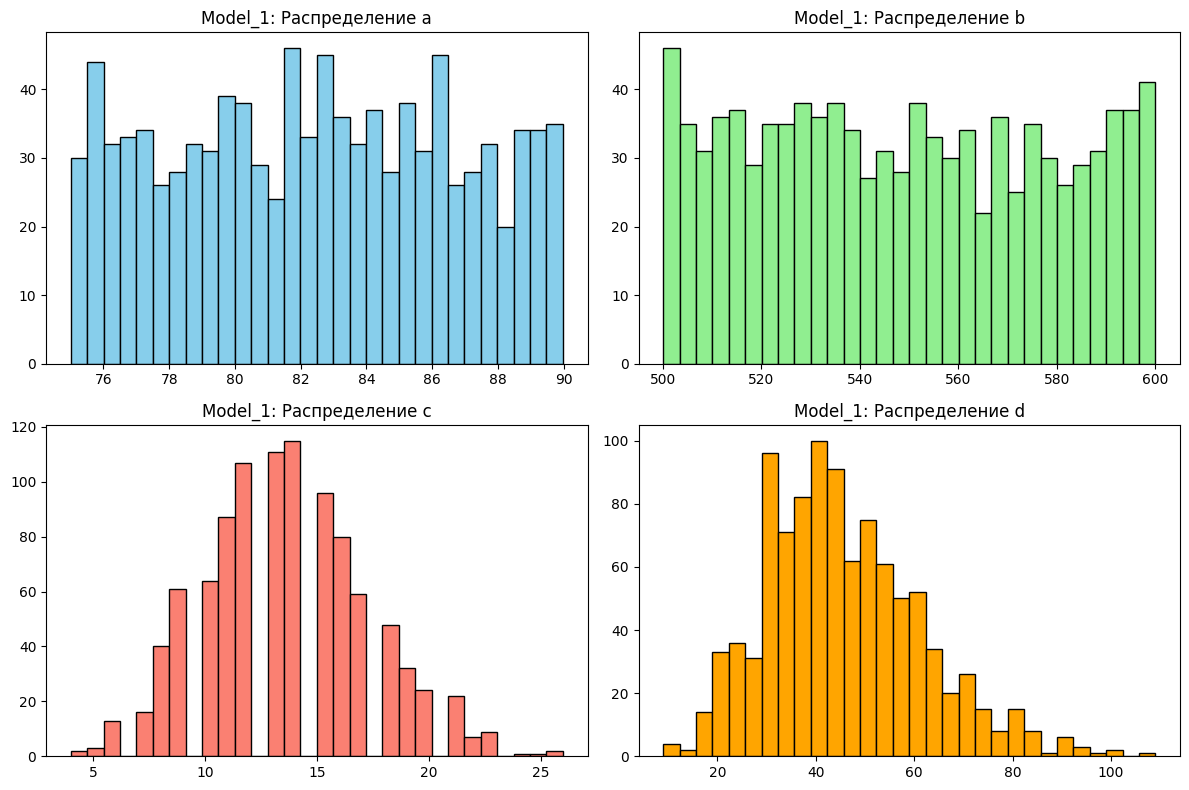




Статистики для Model_2:
              a           b          c          d
mean  82.466728  550.355621  13.729000  17.838000
std    4.278875   29.165740   3.782839   5.139277


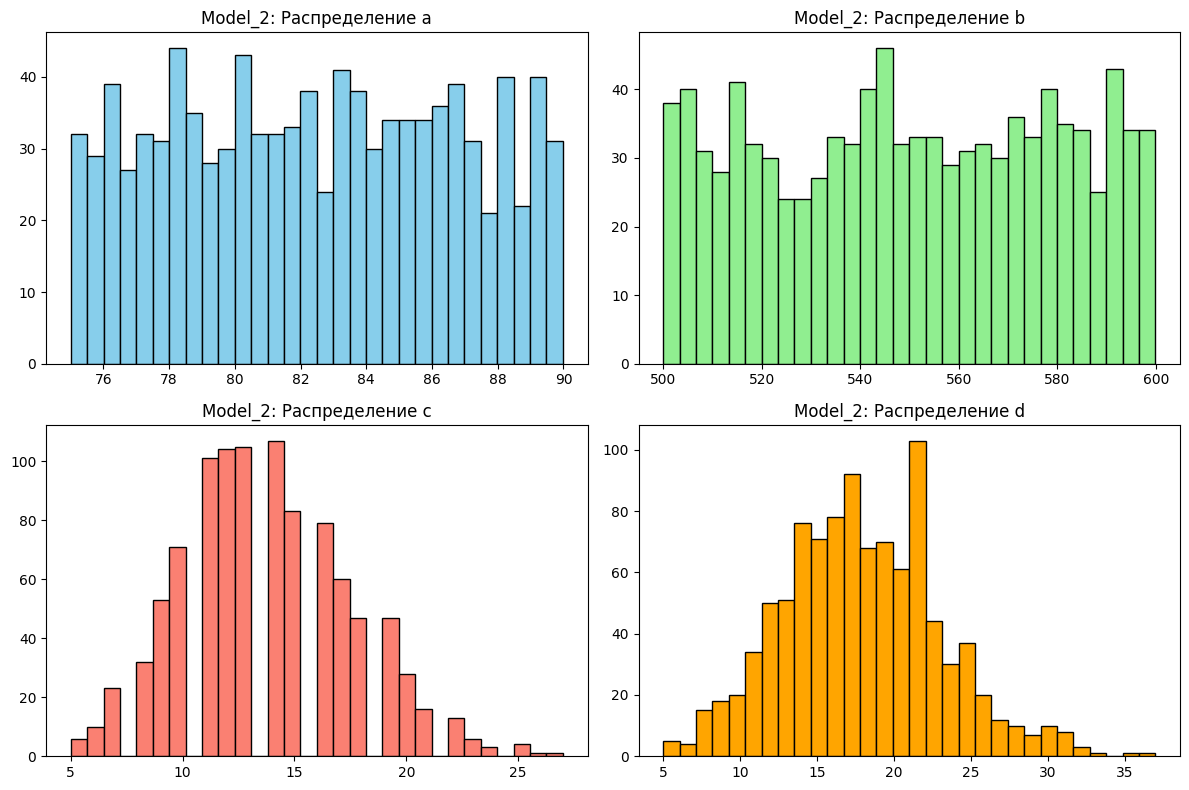

In [6]:
samples_model_1 = model_1.generate_samples(1000)
stats_model_1 = samples_model_1.describe().loc[['mean', 'std']]
# Вывод статистик
print("Статистики для Model_1:")
print(stats_model_1)

# Построение гистограмм
plt.figure(figsize=(12, 8))

plt.subplot(2, 2, 1)
plt.hist(samples_model_1['a'], bins=30, color='skyblue', edgecolor='black')
plt.title('Model_1: Распределение a')

plt.subplot(2, 2, 2)
plt.hist(samples_model_1['b'], bins=30, color='lightgreen', edgecolor='black')
plt.title('Model_1: Распределение b')

plt.subplot(2, 2, 3)
plt.hist(samples_model_1['c'], bins=30, color='salmon', edgecolor='black')
plt.title('Model_1: Распределение c')

plt.subplot(2, 2, 4)
plt.hist(samples_model_1['d'], bins=30, color='orange', edgecolor='black')
plt.title('Model_1: Распределение d')

plt.tight_layout()
plt.show()


samples_model_2 = model_2.generate_samples(1000)
stats_model_2 = samples_model_2.describe().loc[['mean', 'std']]
# Вывод статистик
print("\n\n\nСтатистики для Model_2:")
print(stats_model_2)

# Построение гистограмм
plt.figure(figsize=(12, 8))

plt.subplot(2, 2, 1)
plt.hist(samples_model_2['a'], bins=30, color='skyblue', edgecolor='black')
plt.title('Model_2: Распределение a')

plt.subplot(2, 2, 2)
plt.hist(samples_model_2['b'], bins=30, color='lightgreen', edgecolor='black')
plt.title('Model_2: Распределение b')

plt.subplot(2, 2, 3)
plt.hist(samples_model_2['c'], bins=30, color='salmon', edgecolor='black')
plt.title('Model_2: Распределение c')

plt.subplot(2, 2, 4)
plt.hist(samples_model_2['d'], bins=30, color='orange', edgecolor='black')
plt.title('Model_2: Распределение d')

plt.tight_layout()
plt.show()

Model 1: 


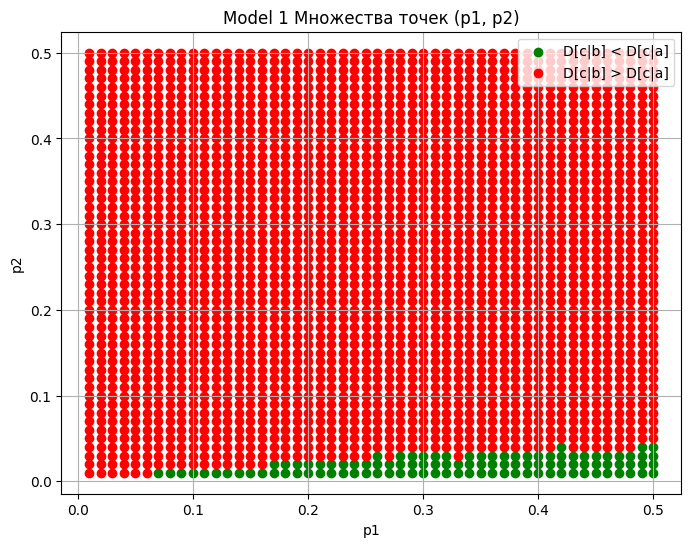

Линейная разделимость: 0.9584 -  True



Model 2: 


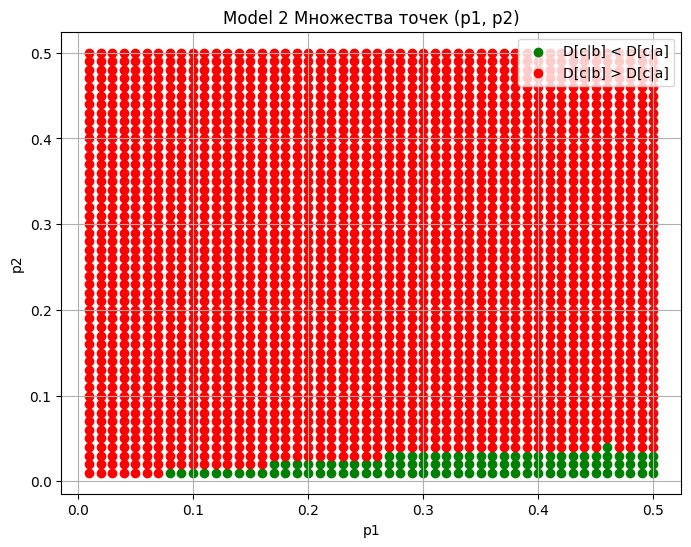

Линейная разделимость: 0.9592 -  True


In [8]:
print("Model 1: ")

# 1. Вычисление мат. ожиданий для a и b
mean_a = round(stats_model_1.loc['mean', 'a'])
mean_b = round(stats_model_1.loc['mean', 'b'])

# 2. Функция для вычисления c в зависимости от a и b
def calculate_c(a, b, p1, p2):
    c_a = np.random.binomial(a, p1, size=1000)  # Генерация выборки для c|a
    c_b = np.random.binomial(b, p2, size=1000)  # Генерация выборки для c|b
    return c_a, c_b

# 3. Поиск множества точек (p1, p2), при которых D[c|b] < D[c|a]
p1_values = np.linspace(0.01, 0.5, 50)
p2_values = np.linspace(0.01, 0.5, 50)

points_D_cb_less_D_ca = []
points_D_cb_greater_D_ca = []

for p1 in p1_values:
    for p2 in p2_values:
        c_a_samples, c_b_samples = calculate_c(mean_a, mean_b, p1, p2)

        D_ca = np.var(c_a_samples)  # Дисперсия c|a
        D_cb = np.var(c_b_samples)  # Дисперсия c|b

        if D_cb < D_ca:
            points_D_cb_less_D_ca.append((p1, p2))
        else:
            points_D_cb_greater_D_ca.append((p1, p2))

# 4. Преобразуем найденные точки в массивы для удобства визуализации
points_D_cb_less_D_ca = np.array(points_D_cb_less_D_ca)
points_D_cb_greater_D_ca = np.array(points_D_cb_greater_D_ca)

# 5. Построение графика множества точек (p1, p2)
plt.figure(figsize=(8, 6))

# Множество точек, где D[c|b] < D[c|a]
plt.scatter(points_D_cb_less_D_ca[:, 0], points_D_cb_less_D_ca[:, 1], color='green', label='D[c|b] < D[c|a]')

# Множество точек, где D[c|b] > D[c|a]
plt.scatter(points_D_cb_greater_D_ca[:, 0], points_D_cb_greater_D_ca[:, 1], color='red', label='D[c|b] > D[c|a]')

# Настройка графика
plt.title('Model 1 Множества точек (p1, p2)')
plt.xlabel('p1')
plt.ylabel('p2')
plt.legend()
plt.grid(True)
plt.show()

# 6. Проверка линейной разделимости множеств
from sklearn.svm import SVC

# Создадим набор данных для классификации
X = np.vstack((points_D_cb_less_D_ca, points_D_cb_greater_D_ca))
y = np.hstack((np.zeros(len(points_D_cb_less_D_ca)), np.ones(len(points_D_cb_greater_D_ca))))

# Обучим линейный классификатор
clf = SVC(kernel='linear')
clf.fit(X, y)

# Проверим точность разделения
print(f"Линейная разделимость: { clf.score(X, y) } - ", clf.score(X, y) > 0.95)






print("\n\n\nModel 2: ")
# 1. Вычисление мат. ожиданий для a и b
mean_a = round(stats_model_2.loc['mean', 'a'])
mean_b = round(stats_model_2.loc['mean', 'b'])

# 2. Функция для вычисления c в зависимости от a и b
def calculate_c(a, b, p1, p2):
    c_a = np.random.binomial(a, p1, size=1000)  # Генерация выборки для c|a
    c_b = np.random.binomial(b, p2, size=1000)  # Генерация выборки для c|b
    return c_a, c_b

# 3. Поиск множества точек (p1, p2), при которых D[c|b] < D[c|a]
p1_values = np.linspace(0.01, 0.5, 50)
p2_values = np.linspace(0.01, 0.5, 50)

points_D_cb_less_D_ca = []
points_D_cb_greater_D_ca = []

for p1 in p1_values:
    for p2 in p2_values:
        c_a_samples, c_b_samples = calculate_c(mean_a, mean_b, p1, p2)

        D_ca = np.var(c_a_samples)  # Дисперсия c|a
        D_cb = np.var(c_b_samples)  # Дисперсия c|b

        if D_cb < D_ca:
            points_D_cb_less_D_ca.append((p1, p2))
        else:
            points_D_cb_greater_D_ca.append((p1, p2))

# 4. Преобразуем найденные точки в массивы для удобства визуализации
points_D_cb_less_D_ca = np.array(points_D_cb_less_D_ca)
points_D_cb_greater_D_ca = np.array(points_D_cb_greater_D_ca)

# 5. Построение графика множества точек (p1, p2)
plt.figure(figsize=(8, 6))

# Множество точек, где D[c|b] < D[c|a]
plt.scatter(points_D_cb_less_D_ca[:, 0], points_D_cb_less_D_ca[:, 1], color='green', label='D[c|b] < D[c|a]')

# Множество точек, где D[c|b] > D[c|a]
plt.scatter(points_D_cb_greater_D_ca[:, 0], points_D_cb_greater_D_ca[:, 1], color='red', label='D[c|b] > D[c|a]')

# Настройка графика
plt.title('Model 2 Множества точек (p1, p2)')
plt.xlabel('p1')
plt.ylabel('p2')
plt.legend()
plt.grid(True)
plt.show()

# 6. Проверка линейной разделимости множеств
from sklearn.svm import SVC

# Создадим набор данных для классификации
X = np.vstack((points_D_cb_less_D_ca, points_D_cb_greater_D_ca))
y = np.hstack((np.zeros(len(points_D_cb_less_D_ca)), np.ones(len(points_D_cb_greater_D_ca))))

# Обучим линейный классификатор
clf = SVC(kernel='linear')
clf.fit(X, y)

# Проверим точность разделения
print(f"Линейная разделимость: { clf.score(X, y) } - ", clf.score(X, y) > 0.95)